|Challenge Set       |**5 **              |
|-------------------:|:-------------------|
|Topic:              |Classification      |
|Date:               |08/01/2016          | 
|Name:               |Bryant Biggs        |
|Worked with:        |N/A                 |
---
# WRITTEN FOR PYTHON 3
### Table of Contents:
 - [**Challenge 1**](#1)
 - [**Challenge 2**](#2)
 - [**Challenge 3**](#3)
 - [**Challenge 4**](#4)
 - [**Challenge 5**](#5)
 - [**Challenge 6**](#6)
 - [**Challenge 7**](#7)
 - [**Challenge 8**](#8)
 - [**Challenge 9**](#9)
 - [**Challenge 10**](#10)
 - [**Challenge 11**](#11)
 - [**Challenge 12**](#12)
---

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

import os
import urllib.request 

import pandas as pd
import numpy as np

from sklearn.cross_validation import train_test_split
from sklearn.learning_curve import learning_curve
from sklearn.metrics import accuracy_score, classification_report
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import cross_val_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# default plot stying changes
import seaborn as sns
sns.set_style("white")
sns.set_context("poster", font_scale=1., rc={"lines.linewidth": 2.5})
sns.set_palette("Set2")
colors = sns.color_palette('Set2',12)

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Data
data = 'house-votes-84.data'
names = 'house-votes-84.names'
base_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/'

files = [data, names]

# download files if they do not exist
for file in files:
    if not os.path.isfile('{0}'.format(file)):
        _ = urllib.request.urlretrieve('{0}/{1}'.format(base_url, file), '{0}'.format(file))

# <a id='1'></a>Challenge 1:
Load the data into a pandas dataframe. Replace 'y's with 1s, 'n's with 0s.

Now, almost every representative has a ?. This represents the absence of a vote (they were absent or some other similar reason). If we dropped all the rows that had a ?, we would throw out most of our data. Instead, we will replace ? with the best guess in the Bayesian sense: in the absence of any other information, we will say that the probability of the representative saying YES is the ratio of others that said YES over the whole votes.

So, convert each ? to this probability (when yes=1 and no=0, this is the mean of the column)

In [3]:
columns =  ['class', 'infants', 'water', 'budget', 'freeze', 'salvador', 'relig', 'anti-sat', 'nic-aid', 
            'missile', 'immig', 'synfuels', 'educ', 'su-fund', 'crime', 'duty-free', 'africa']
df = pd.read_csv(data, sep=',', names=columns)
df = df.replace(['y', 'n'], [1, 0]) 
df.head(3)

,class,infants,water,budget,freeze,salvador,relig,anti-sat,nic-aid,missile,immig,synfuels,educ,su-fund,crime,duty-free,africa
0,republican,0,1,0,1,1,1,0,0,0,1,?,1,1,1,0,1
1,republican,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,?
2,democrat,?,1,1,?,1,1,0,0,0,0,1,0,1,1,0,0


In [4]:
# find majority vote average and replace '?' with majority vote average (1, 0)
for col in columns[1:]:
    df_temp = df[col].value_counts().to_frame()
    ones = int(df_temp.iloc[1])
    zeros = int(df_temp.iloc[0])
    avg = int(round(ones/(ones+zeros), 0))
    df[col] = df[col].replace('?', avg)
df.head(3)

,class,infants,water,budget,freeze,salvador,relig,anti-sat,nic-aid,missile,immig,synfuels,educ,su-fund,crime,duty-free,africa
0,republican,0,1,0,1,1,1,0,0,0,1,0,1,1,1,0,1
1,republican,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,0
2,democrat,0,1,1,0,1,1,0,0,0,0,1,0,1,1,0,0


## Answer for Challenge 1 is:
<br>
<font color='blue'>Dataframe shown above</font>

___

# <a id='2'></a>Challenge 2:
Split the data into a test and training set. Use this function:
```
from sklearn.cross_validation import train_test_split
```

In [5]:
train, test = train_test_split(df, test_size = 0.30, random_state=4444)

data_cols = columns[1:]
label_cols = columns[0]

train_data = train[data_cols]
train_labels = train[label_cols]

test_data = test[data_cols]
test_labels = test[label_cols]

## Answer for Challenge 2 is:

<font color='blue'>Shown directly above (one cell up)</font><br>

___

# <a id='3'></a>Challenge 3:
Using scikit.learn's KNN algorithm, train a model that predicts the party (republican/democrat):

```
from sklearn.neighbors import KNeighborsClassifier
```

Try it with a lot of different k values (number of neighbors), from 1 to 20, and on the test set calculate the accuracy (number of correct predictions / number of all predictions) for each k

You can use this to calculate accuracy:

```
from sklearn.metrics import accuracy_score
```

Which k value gives the highest accuracy?

In [6]:
param_grid = {
            'n_neighbors': list(range(1, 20)),
            'weights': ['uniform', 'distance'],
            'algorithm': ['ball_tree', 'kd_tree'],
            'leaf_size' : list(range(1, 30))
            }
knn_grid = GridSearchCV(KNeighborsClassifier(), param_grid)
knn_mdl = knn_grid.fit(train_data, train_labels)

print('Best score: {0}%'.format(knn_grid.best_score_*100))
print('Best parameters set:')

best_parameters = knn_grid.best_estimator_.get_params()

for param_name in sorted(param_grid.keys()):
    print('\t{0}: {1}'.format(param_name, best_parameters[param_name]))

print(classification_report(test_labels, knn_grid.predict(test_data)))

Best score: 95.06578947368422%
Best parameters set:
	algorithm: ball_tree
	leaf_size: 13
	n_neighbors: 2
	weights: distance
             precision    recall  f1-score   support

   democrat       0.91      0.94      0.92        77
 republican       0.90      0.87      0.89        54

avg / total       0.91      0.91      0.91       131



## Answer for Challenge 3 is:
<br>
<font color='blue'>The best accuracy is when k = 2.</font>

___

# <a id='4'></a>Challenge 4:
Make a similar model but with LogisticRegression instead, calculate test accuracy.

In [7]:
param_grid = {
            'penalty': ['l2'],
            'class_weight': ['balanced'],
            'solver': ['newton-cg', 'lbfgs', 'sag'],
            'multi_class': ['ovr']
            }

logr_grid = GridSearchCV(LogisticRegression(n_jobs=-1), param_grid)
logr_mdl = logr_grid.fit(train_data, train_labels)

print('Best score: {0}%'.format(logr_grid.best_score_*100))
print('Testing accuracy: {0}%'.format(accuracy_score(test_labels, logr_grid.predict(test_data))*100))
print('Best parameters set:')

best_parameters = logr_grid.best_estimator_.get_params()

for param_name in sorted(param_grid.keys()):
    print('\t{0}: {1}'.format(param_name, best_parameters[param_name]))

print(classification_report(test_labels, logr_grid.predict(test_data)))

Best score: 96.05263157894737%
Testing accuracy: 93.89312977099237%
Best parameters set:
	class_weight: balanced
	multi_class: ovr
	penalty: l2
	solver: newton-cg
             precision    recall  f1-score   support

   democrat       0.94      0.96      0.95        77
 republican       0.94      0.91      0.92        54

avg / total       0.94      0.94      0.94       131



## Answer for Challenge 4 is:

<font color='blue'>The best testing accuracy is 93.89%</font>
___

# <a id='5'></a>Challenge 5:
Make a bar graph of democrats and republicans. How many of each are there?

Make a very simple predictor that predicts 'democrat' for every incoming example.

Just make a function that takes in an X --an array or matrix with input examples--, and returns an array of the same length as X, where each value is 'democrat'. For example, if X is three rows, your function should return ['democrat','democrat','democrat']. Make a y_predicted vector using this and measure its accuracy.

Do the same with predicting 'republican' all the time and measure its accuracy.

In [8]:
cnts = df['class'].value_counts().to_frame().reset_index()
cnts

,index,class
0,democrat,267
1,republican,168


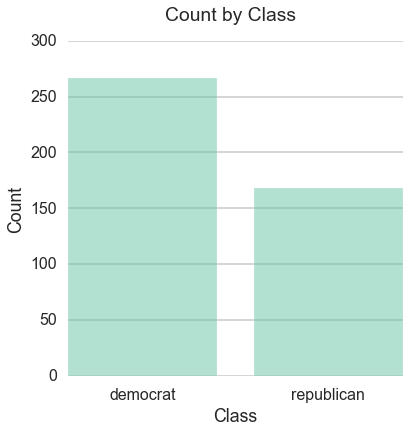

In [9]:
# make figure
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)

# data
classes = cnts['index'].values.tolist()
counts = cnts['class'].values.tolist()
y_pos = np.arange(len(classes))

# chart
ax.bar(y_pos, counts, align='center', alpha=0.5, edgecolor='w')
plt.xticks(y_pos, classes)

# labels/titles
plt.suptitle('Count by Class')
plt.ylabel('Count')
plt.xlabel('Class')

# remove border
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False) 
ax.spines["bottom"].set_visible(False) 
ax.spines["left"].set_visible(False)

# show grid
ax.yaxis.grid(True)
plt.show()

In [10]:
def dem_pred(X):
    if len(X) >= 1:
        return ['democrat' for i in range(len(X))]

In [11]:
xD_vals = df[columns[1:]].head(10)
yD_vals = dem_pred(xD_vals)

print('dem_pred function prediction accuracy: {0}%'.format(accuracy_score(yD_vals, logr_grid.predict(xD_vals))*100))

dem_pred function prediction accuracy: 50.0%


In [12]:
def repub_pred(X):
    if len(X) >= 1:
        return ['republican' for i in range(len(X))]

In [13]:
xR_vals = df[columns[1:]].head(10)
yR_vals = repub_pred(xR_vals)

print('dem_pred function prediction accuracy: {0}%'.format(accuracy_score(yR_vals, logr_grid.predict(xR_vals))*100))

dem_pred function prediction accuracy: 50.0%


## Answer for Challenge 5 is:

<font color='blue'>Shown above</font>
___

# <a id='6'></a>Challenge 6:
Plot the accuracies as a function of k. Since k only matters for KNN, your logistic regression accuracy, 'democrat' predictor accuracy and 'republican' predictor accuracy will stay the same over all k, so each of these three will be a horizontal line. But the KNN accuracy will change with k.

In [14]:
knn_dict = {}
for i in range(1,21):
    knn_clf = KNeighborsClassifier(n_neighbors=i, weights='distance', 
                               algorithm='ball_tree', leaf_size=13)
    knn_mdl = knn_clf.fit(train_data, train_labels)
    knn_dict[i] = accuracy_score(test_labels, knn_mdl.predict(test_data))*100

In [15]:
knn_k = [int(k) for k,v in knn_dict.items()]
knn_val = [v for k,v in knn_dict.items()]

log_k = knn_k
log_val = [accuracy_score(test_labels, logr_grid.predict(test_data))*100 for i in range(len(log_k))]

dem_k = knn_k
dem_val = [accuracy_score(yD_vals, logr_grid.predict(xD_vals))*100 for i in range(len(dem_k))]

rep_k = knn_k
rep_val = [accuracy_score(yR_vals, logr_grid.predict(xR_vals))*100 for i in range(len(dem_k))]

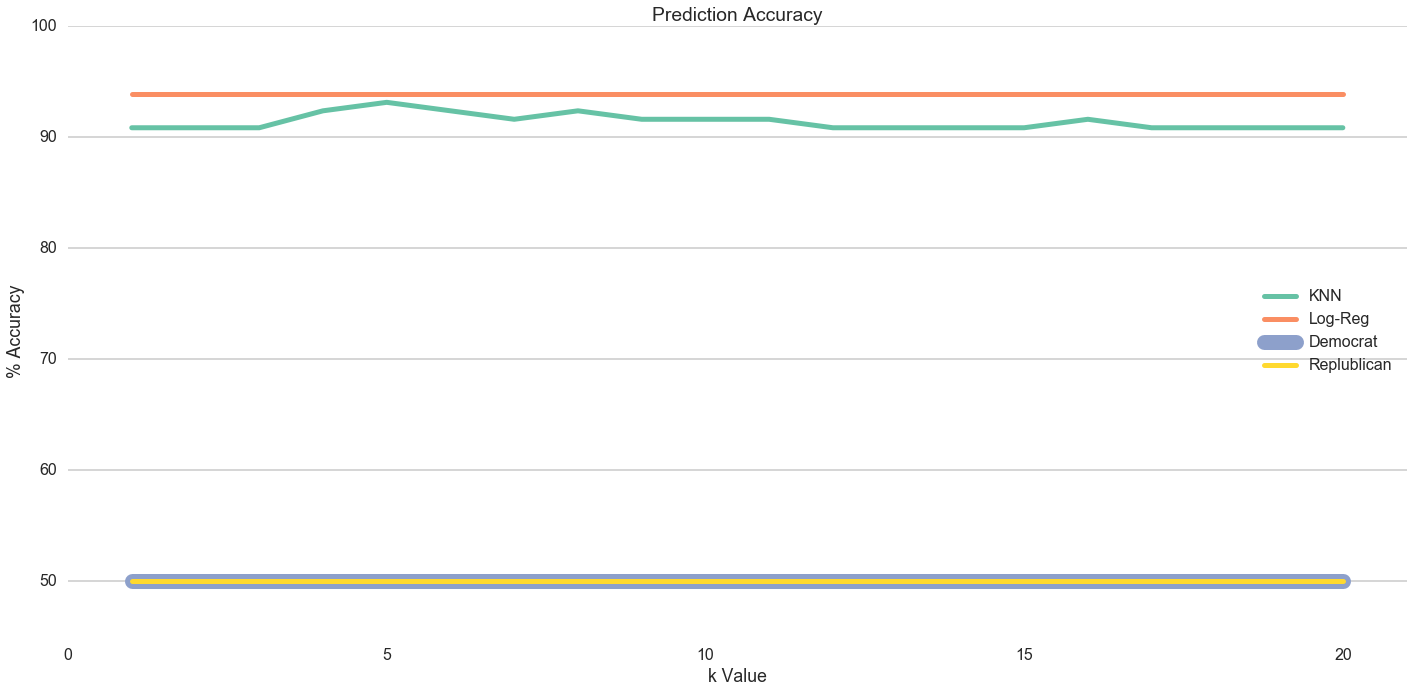

In [16]:
# make figure
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)

# plots
ax.plot(knn_k, knn_val, color=colors[0], linewidth=5.0, label='KNN')
ax.plot(log_k, log_val, color=colors[1], linewidth=5.0, label='Log-Reg')
ax.plot(dem_k, dem_val, color=colors[2], linewidth=15.0, label='Democrat')
ax.plot(rep_k, rep_val, color=colors[5], linewidth=5.0, label='Replublican')

# labels/titles
plt.legend(loc="best")
plt.title('Prediction Accuracy')
plt.xlabel('k Value')
plt.ylabel('% Accuracy')

# limits
plt.ylim(45,100)
plt.xlim(0,21)

# remove border
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False) 
ax.spines["bottom"].set_visible(False) 
ax.spines["left"].set_visible(False)

# show grid
ax.yaxis.grid(True) 

# plot that biddy
plt.tight_layout()
_ = plt.show()

## Answer for Challenge 6 is:

<font color='blue'>Shown above</font>
___

# <a id='7'></a>Challenge 7:
Plot a learning curve for the logistic regression model. But instead of going through the painstaking steps of doing it yourself, use this function:
```
from sklearn.learning_curve import learning_curve
```
This will give you the m, training errors and testing errors. All you need to do is plot them. You don't even need to give it separate training/test sets. It will do crossvalidation all by itself. Easy, isn't it? : ) Remember, since it does cross-validation, it doesn't have a single training error or test error per m value. Instead, it has one for each fold (separate partition) of the cross validation. A good idea is to take the mean of these errors from different folds. This gives you a meaningful single number per m. What I mean is that doing something like:
```
train_cv_err = np.mean(train_err, axis=1)
test_cv_err = np.mean(ts_err, axis=1)
```
Before plotting m vs train_cv_err and m vs test_cv_err, where train_err and test_err are the vectors returned by the learning curve function. The np.mean(...., axis=1) means take the mean along axis 1 (axis 1 is the columns axis-- for each row, you have a bunch of columns, each corresponding to a cross validation fold, you are averaging these columns for each row).

Draw the learning curve for KNN with the best k value as well.

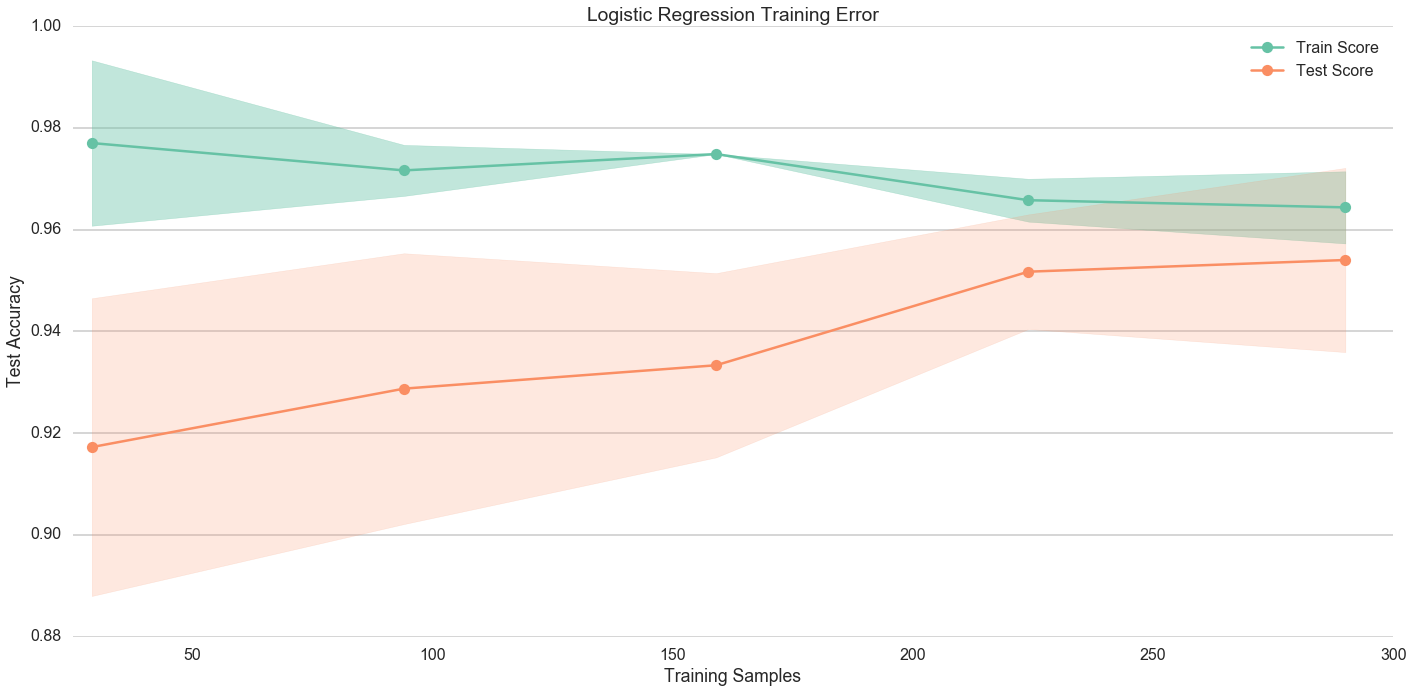

In [17]:
# make figure
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)

# data
X = df[columns[1:]]
y = df[columns[0]]

train_sizes, train_scores, test_scores = learning_curve(logr_grid, X, y, n_jobs=4, )
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# plots
ax.fill_between(train_sizes, train_scores_mean - train_scores_std, 
                 train_scores_mean + train_scores_std, alpha=0.4, color=colors[0])
ax.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2, color=colors[1])
ax.plot(train_sizes, train_scores_mean, 'o-', color=colors[0], label='Train Score')
ax.plot(train_sizes, test_scores_mean, 'o-', color=colors[1], label='Test Score')

plt.xlim(25,300)

# labels/titles
plt.legend(loc="best")
plt.title('Logistic Regression Training Error')
plt.xlabel('Training Samples')
plt.ylabel('Test Accuracy')

# remove border
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False) 
ax.spines["bottom"].set_visible(False) 
ax.spines["left"].set_visible(False)

# show grid
ax.yaxis.grid(True) 

# plot that biddy
plt.tight_layout()
_ = plt.show()

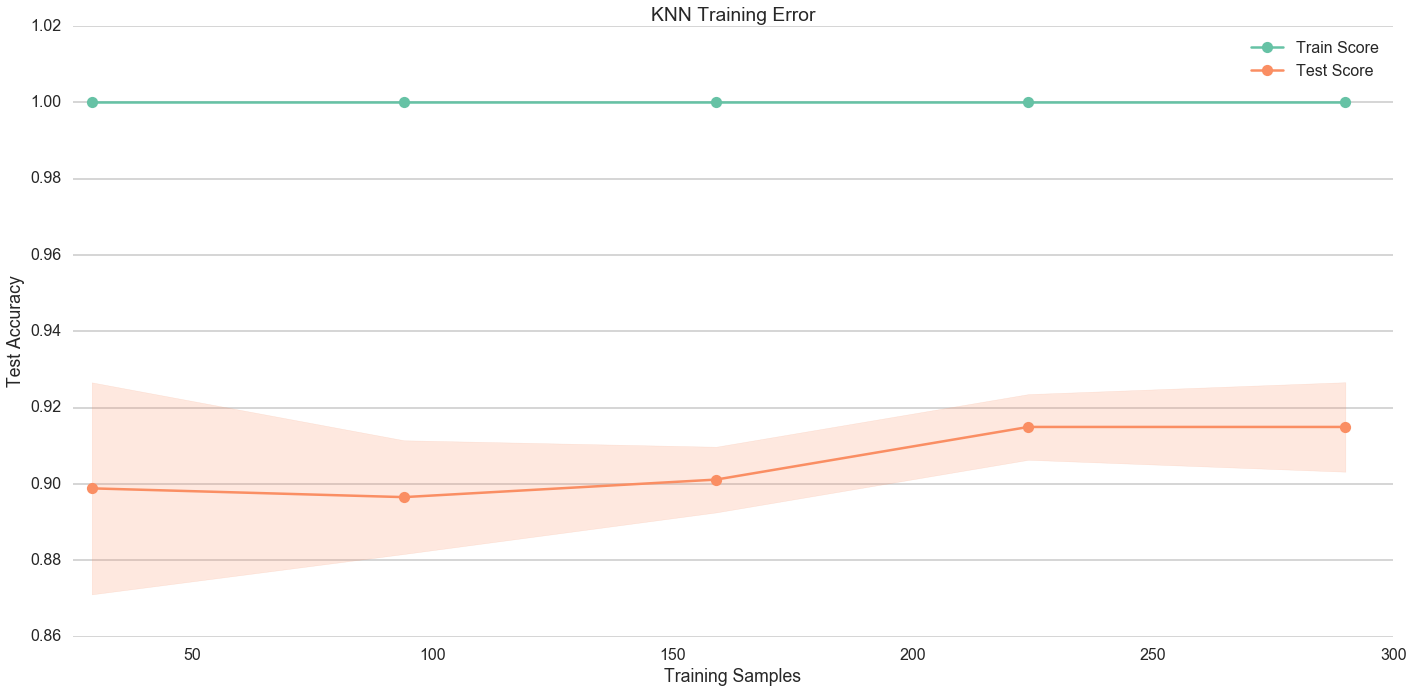

In [18]:
# make figure
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)

# data
X = df[columns[1:]]
y = df[columns[0]]

train_sizes, train_scores, test_scores = learning_curve(knn_mdl, X, y, n_jobs=4)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.xlim(25,300)
plt.ylim(0.86, 1.02)

# plots
ax.fill_between(train_sizes, train_scores_mean - train_scores_std, 
                 train_scores_mean + train_scores_std, alpha=0.4, color=colors[0])
ax.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2, color=colors[1])
ax.plot(train_sizes, train_scores_mean, 'o-', color=colors[0], label='Train Score')
ax.plot(train_sizes, test_scores_mean, 'o-', color=colors[1], label='Test Score')

# labels/titles
plt.legend(loc="best")
plt.title('KNN Training Error')
plt.xlabel('Training Samples')
plt.ylabel('Test Accuracy')

# remove border
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False) 
ax.spines["bottom"].set_visible(False) 
ax.spines["left"].set_visible(False)

# show grid
ax.yaxis.grid(True) 

# plot that biddy
plt.tight_layout()
_ = plt.show()

## Answer for Challenge 7 is:

<font color='blue'>Shown above</font>
___

# <a id='8'></a>Challenge 8:
This is a preview of many other classification algorithms that we will go over. Scikit.learn has the same interface for all of these, so you can use them exactly the same way as you did LogisticRegression and KNeighborsClassifier. Use each of these to classify your data and print the test accuracy of each:

Gaussian Naive Bayes
```
from sklearn.naive_bayes import GaussianNB
```
SVM (Support Vector Machine) Classifier
````
from sklearn.svm import SVC
```
Decision Tree
```
from sklearn.tree import DecisionTreeClassifier
```
Random Forest
```
from sklearn.ensemble import RandomForestClassifier
```

In [19]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [20]:
bayes_clf = GaussianNB()
bayes_mdl = bayes_clf.fit(train_data, train_labels)

print('Testing accuracy: {0:.2f}%'.format(accuracy_score(test_labels, bayes_mdl.predict(test_data))*100))

Testing accuracy: 94.66%


In [21]:
svc_clf = SVC()
svc_mdl = svc_clf.fit(train_data, train_labels)

print('Testing accuracy: {0:.2f}%'.format(accuracy_score(test_labels, svc_mdl.predict(test_data))*100))

Testing accuracy: 95.42%


In [22]:
dtree_clf = DecisionTreeClassifier()
dtree_mdl = dtree_clf.fit(train_data, train_labels)

print('Testing accuracy: {0:.2f}%'.format(accuracy_score(test_labels, dtree_mdl.predict(test_data))*100))

Testing accuracy: 93.89%


In [23]:
rforest_clf = RandomForestClassifier()
rforest_mdl = rforest_clf.fit(train_data, train_labels)

print('Testing accuracy: {0:.2f}%'.format(accuracy_score(test_labels, rforest_mdl.predict(test_data))*100))

Testing accuracy: 95.42%


## Answer for Challenge 8 is:

<font color='blue'>Shown above</font>
___

# <a id='9'></a>Challenge 9:
There is actually a way to do cross validation quickly to get your accuracy results for an algorithm, without separating training and test yourself:
```
from sklearn.cross_validation import cross_val_score
```
Just like the learning_curve function, this takes a classifier object, X and Y. Returns accuracy (or whatever score you prefer by using the scoring keyword argument). Of course, it will return a score for each cross validation fold, so to get the generalized accuracy, you need to take the mean of what it returns.

Use this function to calculate the cross validation score of each of the classifiers you tried before.

In [24]:
bayes_s = cross_val_score(bayes_mdl, X, y)
print('GaussianNB accuracy: {0:.2f}% (+/- {1:.2f}%)'.format(bayes_s.mean()*100, bayes_s.std()*2*100))

GaussianNB accuracy: 93.56% (+/- 2.34%)


In [25]:
svc_s = cross_val_score(svc_mdl, X, y)
print('SVC accuracy: {0:.2f}% (+/- {1:.2f}%)'.format(svc_s.mean()*100, svc_s.std()*2*100))

SVC accuracy: 95.63% (+/- 2.83%)


In [26]:
dec_s = cross_val_score(dtree_mdl, X, y)
print('DecisionTreeClassifier accuracy: {0:.2f}% (+/- {1:.2f}%)'.format(dec_s.mean()*100, dec_s.std()*2*100))

DecisionTreeClassifier accuracy: 95.17% (+/- 1.95%)


In [27]:
rdm_s = cross_val_score(rforest_mdl, X, y)
print('RandomForrestClassifier accuracy: {0:.2f}% (+/- {1:.2f}%)'.format(rdm_s.mean()*100, rdm_s.std()*2*100))

RandomForrestClassifier accuracy: 95.40% (+/- 3.25%)


## Answer for Challenge 9 is:

<font color='blue'>Shown above</font>
___

# <a id='10'></a>Challenge 10:
Instead of 'democrat' or 'republican', can you predict the vote of a representative based on their other votes?

Reload the data from scratch. Convert y-->1, n-->0.

Choose one vote. Build a classifier (logistic regression or KNN), that uses the other votes (do not use the party as a feature) to predict if the vote will be 1 or 0.

Convert each ? to the mode of the column (if a senator has not voted, make their vote 1 if most others voted 1, make it 0 if most others voted 0).

Calculate the cross validation accuracy of your classifier for predicting how each representative will vote on the issue.

In [28]:
columns =  ['class', 'infants', 'water', 'budget', 'freeze', 'salvador', 'relig', 'anti-sat', 'nic-aid', 
            'missile', 'immig', 'synfuels', 'educ', 'su-fund', 'crime', 'duty-free', 'africa']
df = pd.read_csv(data, sep=',', names=columns)
df = df.replace(['y', 'n'], [1, 0]) 

In [29]:
# find majority vote and replace '?' with majority vote mode (1, 0)
for col in columns[1:]:
    df_temp = df[col].value_counts().to_frame()
    ones = int(df_temp.iloc[1])
    zeros = int(df_temp.iloc[0])
    if ones > zeros:
        avg = 0
    else:
        avg = 1
    df[col] = df[col].replace('?', avg)
#df.head(3)

In [30]:
train, test = train_test_split(df, test_size = 0.30, random_state=4444)

data_cols = columns[6:]
label_cols = columns[3]

train_data = train[data_cols]
train_labels = train[label_cols]

test_data = test[data_cols]
test_labels = test[label_cols]

In [31]:
knn_dict = {}
for i in range(1,21):
    knn_clf = KNeighborsClassifier(n_neighbors=i, weights='distance', algorithm='ball_tree', leaf_size=13)
    knn_mdl = knn_clf.fit(train_data, train_labels)
    knn_dict[i] = accuracy_score(test_labels, knn_mdl.predict(test_data))*100

max(knn_dict.values()) #7

90.07633587786259

In [32]:
knn_clf = KNeighborsClassifier(n_neighbors=7, weights='distance', algorithm='ball_tree', leaf_size=13)
knn_mdl = knn_clf.fit(train_data, train_labels)

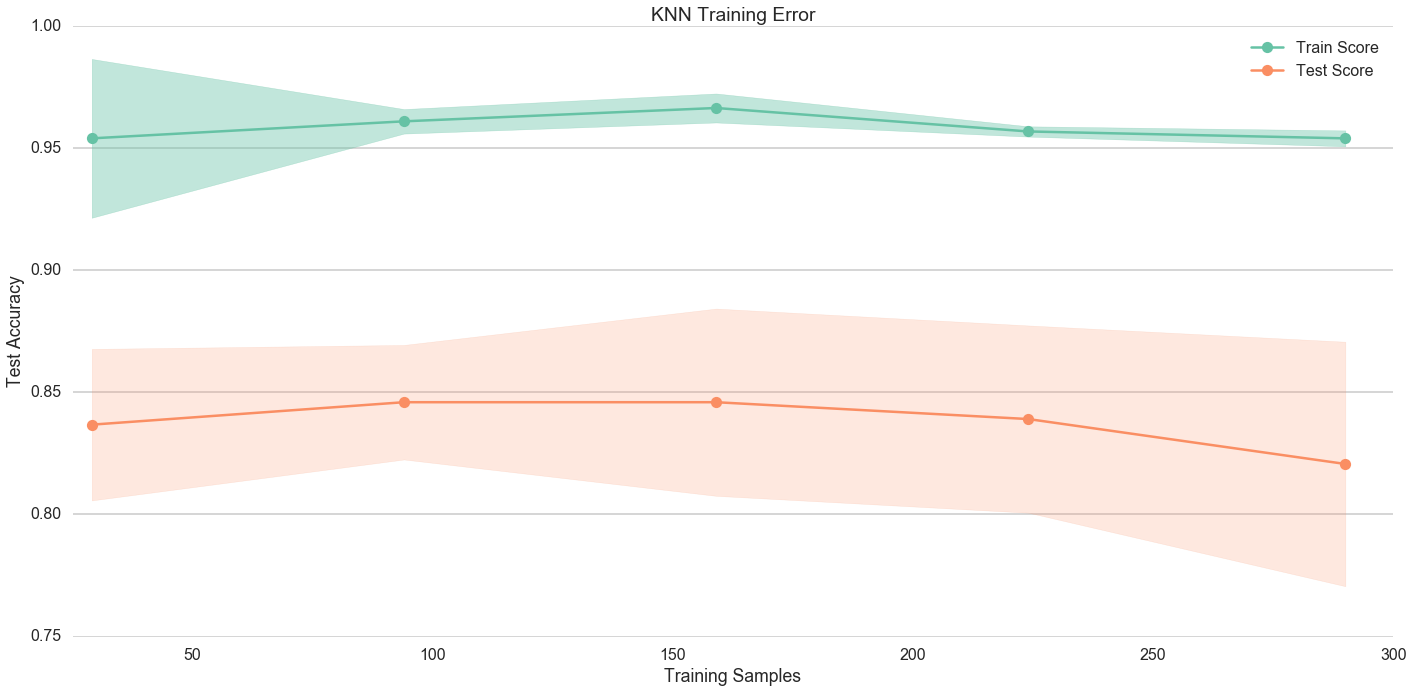

In [33]:
# make figure
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)

# data
X = df[columns[6:]]
y = df[columns[3]]

train_sizes, train_scores, test_scores = learning_curve(knn_mdl, X, y)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# plots
ax.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.4, color=colors[0])
ax.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2, color=colors[1])
ax.plot(train_sizes, train_scores_mean, 'o-', color=colors[0], label='Train Score')
ax.plot(train_sizes, test_scores_mean, 'o-', color=colors[1], label='Test Score')

plt.xlim(25,300)

# labels/titles
plt.legend(loc="best")
plt.title('KNN Training Error')
plt.xlabel('Training Samples')
plt.ylabel('Test Accuracy')

# remove border
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False) 
ax.spines["bottom"].set_visible(False) 
ax.spines["left"].set_visible(False)

# show grid
ax.yaxis.grid(True) 

# plot that biddy
plt.tight_layout()
_ = plt.show()

## Answer for Challenge 10 is:

<font color='blue'>Chart shown above</font>
___

# <a id='11'></a>Challenge 11:
Back to movie data! Choose one categoric feature to predict. I chose MPAA Rating, but genre, month, etc. are all decent choices. If you don't have any non-numeric features, you can make two bins out of a numeric one (like "Runtime>100 mins" and "Runtime<=100 mins")

Make a bar graph of how many of each movie there is in the data. For example, with Ratings, show how many G, PG, PG-13, R movies there are, etc. (basically a histogram of your labels).

Predict your outcome variable (labels) using KNN and logistic regression. Calculate their accuracies.

Make a baseline stupid predictor that always predicts the label that is present the most in the data. Calculate its accuracy on a test set.

How much better do KNN and logistic regression do versus the baseline?

What are the coefficients of logistic regression? Which features affect the outcome how?

In [34]:
movie_data = '../../../challenges_data/2013_movies.csv'
df_mv = pd.read_csv(movie_data, sep=',')
df_mv.head(3)

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,2013-11-22 00:00:00
1,Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,2013-05-03 00:00:00
2,Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22 00:00:00


In [35]:
cnts = df_mv['Rating'].value_counts().to_frame().reset_index()
cnts

,index,Rating
0,PG-13,47
1,R,37
2,PG,15
3,G,1


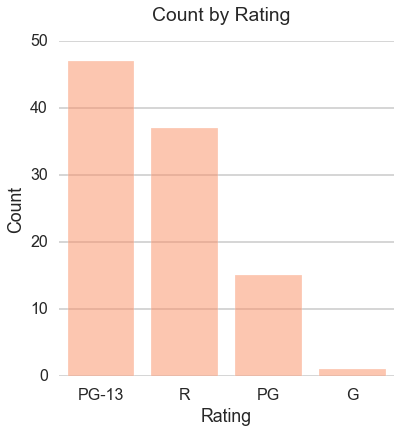

In [36]:
# make figure
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)

# data
ratings = cnts['index'].values.tolist()
counts = cnts['Rating'].values.tolist()
y_pos = np.arange(len(ratings))

# chart
ax.bar(y_pos, counts, align='center', color=colors[1], alpha=0.5, edgecolor='w')
plt.xticks(y_pos, ratings)

# labels/titles
plt.suptitle('Count by Rating')
plt.ylabel('Count')
plt.xlabel('Rating')

# remove border
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False) 
ax.spines["bottom"].set_visible(False) 
ax.spines["left"].set_visible(False)

# show grid
ax.yaxis.grid(True)
plt.show()

In [37]:
# remove nan's
df_mv = df_mv.dropna(axis=0, how='any')

assert df_mv['Budget'].dtype == 'float64'
assert df_mv['DomesticTotalGross'].dtype == 'int64'
assert df_mv['Runtime'].dtype == 'int64'

# split data set
train, test = train_test_split(df_mv, test_size = 0.30, random_state=4444)

# grab label column
train_labels = train['Rating']
test_labels = test['Rating']

# grab data columns
train_data = train[['Budget', 'DomesticTotalGross', 'Runtime']]
test_data = test[['Budget', 'DomesticTotalGross', 'Runtime']]

In [38]:
knn_dict = {}
for x in range(1,21):
    for y in range(1,21):
        knn_clf = KNeighborsClassifier(n_neighbors=x, leaf_size=y)
        knn_mdl = knn_clf.fit(train_data, train_labels)
        knn_dict[(x,y)] = accuracy_score(test_labels, knn_mdl.predict(test_data))*100

print('KNN accuracy: {0:.2f}%'.format(max(knn_dict.values())))

KNN accuracy: 55.56%


In [39]:
log_clf = LogisticRegression()
log_mdl = log_clf.fit(train_data, train_labels)
print('Logistic Regression accuracy: {0:.2f}%'.format(accuracy_score(test_labels, log_mdl.predict(test_data))*100))

Logistic Regression accuracy: 44.44%


In [40]:
def dumb_pg13(X):
    if len(X) >= 1:
        return ['PG-13' for i in range(len(X))]

In [41]:
x_vals = df_mv[['Budget', 'DomesticTotalGross', 'Runtime']].head(20)
y_vals = dumb_pg13(x_vals)

print('Dummy function prediction accuracy: {0}%'.format(accuracy_score(y_vals, knn_mdl.predict(x_vals))*100))

Dummy function prediction accuracy: 65.0%


In [42]:
dum_dict = {}
for i in range(1,len(df_mv)+1):
    x_vals = df_mv[['Budget', 'DomesticTotalGross', 'Runtime']].head(i)
    y_vals = dumb_pg13(x_vals)

    dum_dict[i] = accuracy_score(y_vals, knn_mdl.predict(x_vals))*100

knn_k = [int(k) for k,v in dum_dict.items()]
knn_val = [v for k,v in dum_dict.items()]
min(dum_dict.values())

40.229885057471265

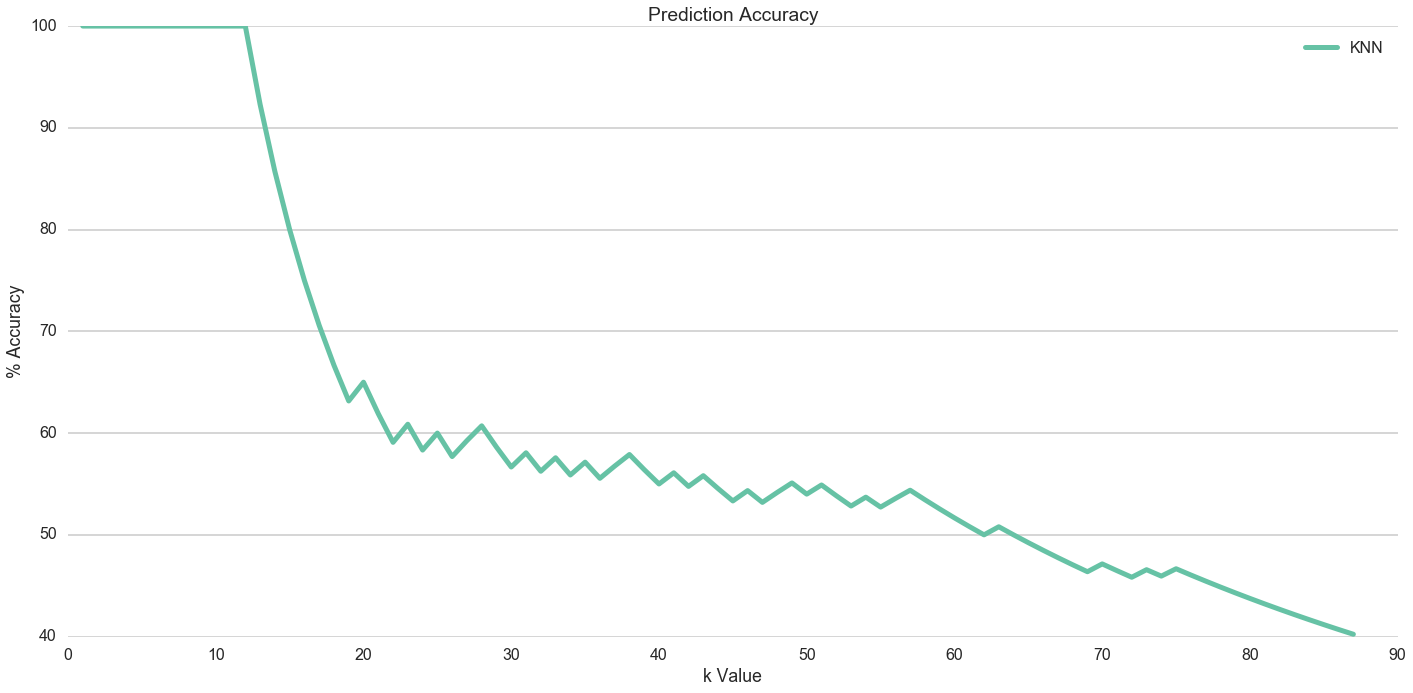

In [43]:
# make figure
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)

# plots
ax.plot(knn_k, knn_val, color=colors[0], linewidth=5.0, label='KNN')

# labels/titles
plt.legend(loc="best")
plt.title('Prediction Accuracy')
plt.xlabel('k Value')
plt.ylabel('% Accuracy')

# limits
#plt.ylim(45,100)
#plt.xlim(0,21)

# remove border
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False) 
ax.spines["bottom"].set_visible(False) 
ax.spines["left"].set_visible(False)

# show grid
ax.yaxis.grid(True) 

# plot that biddy
plt.tight_layout()
_ = plt.show()

In [44]:
log_mdl.coef_ #['Budget', 'DomesticTotalGross', 'Runtime']

array([[ -1.46124379e-08,  -1.93897623e-09,  -1.75965536e-13],
       [  1.49848414e-08,  -6.42667083e-09,  -9.13751595e-14],
       [ -2.30763200e-08,   5.12598612e-09,   1.16458130e-13]])

## Answer for Challenge 11 is:

<font color='blue'>KNN accuracy = 55.56%</font>
<font color='blue'>Logistic regression accuracy = 44.44%</font>
<font color='blue'>Dummy function accuracy bottoms out at 40.23%</font>
___

# <a id='12'></a>Challenge 12:
Now you are a classification master. The representative votes dataset only had 0s and 1s. Let's just swiftly tackle the breast cancer surgery data.

In [45]:
# Data
data = 'haberman.data'
names = 'haberman.names'
base_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/haberman/'

files = [data, names]

# download files if they do not exist
for file in files:
    if not os.path.isfile('{0}'.format(file)):
        _ = urllib.request.urlretrieve('{0}/{1}'.format(base_url, file), '{0}'.format(file))

In [46]:
columns =  ['age', 'year_op', 'num_pos', 'status']
df_3 = pd.read_csv(data, sep=',', names=columns)
df_3.head(3)

,age,year_op,num_pos,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1


* What is the average and standard deviation of the age of all of the patients?

In [47]:
print('Age standard deviation is: {0:.2f} years'.format(df_3['age'].std()))
print('Average age is: {0:.2f} years'.format(df_3['age'].mean()))

Age standard deviation is: 10.80 years
Average age is: 52.46 years


* What is the average and standard deviation of the age of those patients that survived 5 or more years after surgery?

In [48]:
df_3a = df_3[df_3['status']==1]
print('Age standard deviation is: {0:.2f} years'.format(df_3a['age'].std()))
print('Average age is: {0:.2f} years'.format(df_3a['age'].mean()))

Age standard deviation is: 11.01 years
Average age is: 52.02 years


* What is the average and standard deviation of the age of those patients who survived fewer than 5 years after surgery?

In [49]:
df_3b = df_3[df_3['status']!=1]
print('Age standard deviation is: {0:.2f} years'.format(df_3b['age'].std()))
print('Average age is: {0:.2f} years'.format(df_3b['age'].mean()))

Age standard deviation is: 10.17 years
Average age is: 53.68 years


* Plot a histogram of the ages side by side with a histogram of the number of axillary nodes.

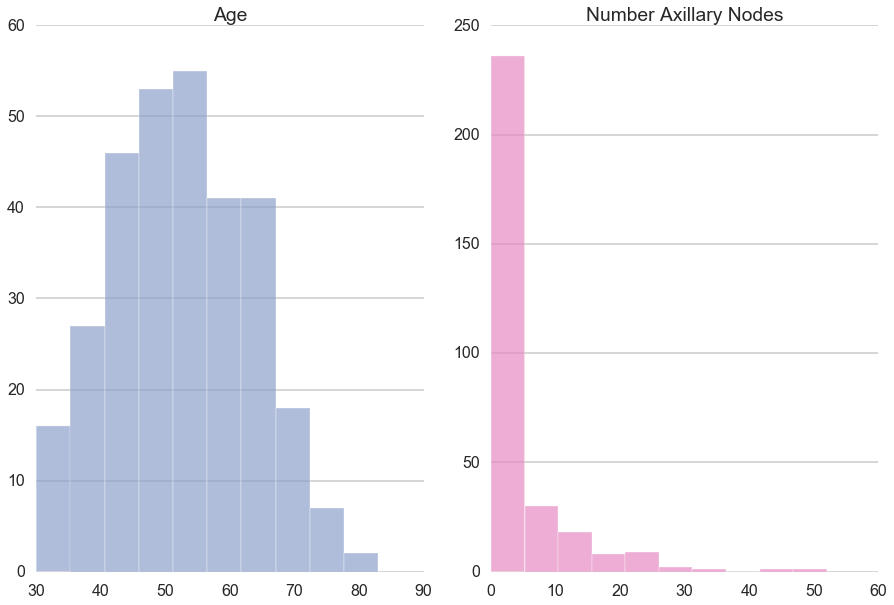

In [50]:
fig, axes = plt.subplots(nrows=1, ncols=2)
ax0, ax1 = axes.flat

# show grid
ax0.yaxis.grid(True) 
ax1.yaxis.grid(True) 

ax0.hist(df_3['age'], histtype='bar', color=colors[2], edgecolor='w', alpha=0.7)
ax0.set_title('Age')

# remove border
ax0.spines["top"].set_visible(False)  
ax0.spines["right"].set_visible(False) 
ax0.spines["bottom"].set_visible(False) 
ax0.spines["left"].set_visible(False)

ax1.hist(df_3['num_pos'], histtype='bar', color=colors[3], edgecolor='w', alpha=0.7)
ax1.set_title('Number Axillary Nodes')

# remove border
ax1.spines["top"].set_visible(False)  
ax1.spines["right"].set_visible(False) 
ax1.spines["bottom"].set_visible(False) 
ax1.spines["left"].set_visible(False)

plt.tight_layout()
plt.show()

* What is the earliest year of surgery in this dataset?

In [51]:
min(df_3['year_op'])

58

* What is the most recent year of surgery?

In [52]:
max(df_3['year_op'])

69

* Use logistic regression to predict survival after 5 years. How well does your model do?

In [53]:
df_3.head()

,age,year_op,num_pos,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [54]:
# split data set
train, test = train_test_split(df_3, test_size = 0.30, random_state=4444)

# grab label column
train_labels = train['status']
test_labels = test['status']

# grab data columns
train_data = train[['age', 'year_op', 'num_pos']]
test_data = test[['age', 'year_op', 'num_pos']]

In [55]:
log_clf = LogisticRegression()
log_mdl = log_clf.fit(train_data, train_labels)
print('Logistic Regression accuracy: {0:.2f}%'.format(accuracy_score(test_labels, log_mdl.predict(test_data))*100))

Logistic Regression accuracy: 81.52%


* What are the coefficients of logistic regression? Which features affect the outcome how?

In [56]:
cols = df_3.columns
coefs = log_mdl.coef_.tolist()[0]
lst = list(zip(cols,coefs))
lst

[('age', 0.015551502481860253),
 ('year_op', -0.028992790586229975),
 ('num_pos', 0.07136196550466622)]

<font color='blue'>Number of positive axillary nodes detected carries the most influence over the model prediction (positive correlation) while year of the operation has a negative correlation.</font>

* Draw the learning curve for logistic regression in this case.

In [57]:
columns =  ['age', 'year_op', 'num_pos', 'status']
df_3 = pd.read_csv(data, sep=',', names=columns)
df_3.head(3)

,age,year_op,num_pos,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1


In [58]:
y3 = df_3['status']
X3 = df_3[['age', 'year_op', 'num_pos']]

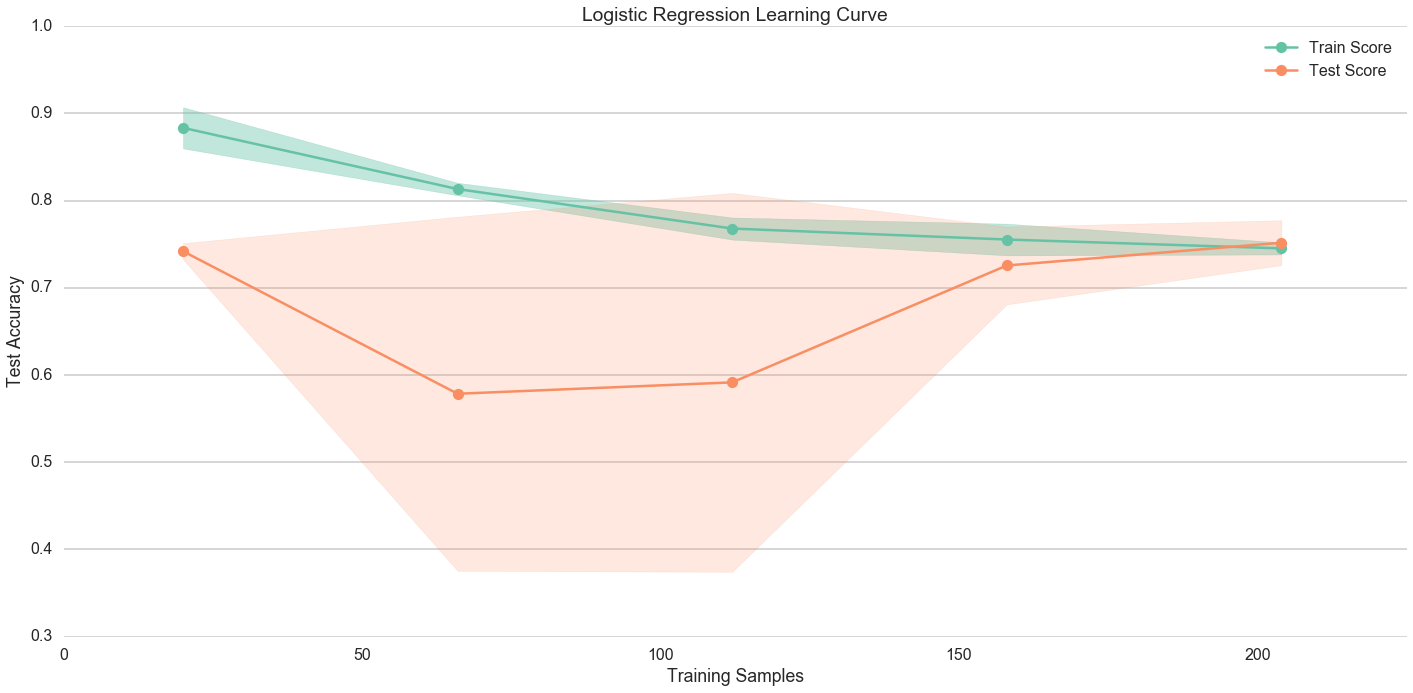

In [59]:
# make figure
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)

train_sizes, train_scores, test_scores = learning_curve(log_mdl, X3, y3)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# plots
ax.fill_between(train_sizes, train_scores_mean - train_scores_std, 
                 train_scores_mean + train_scores_std, alpha=0.4, color=colors[0])
ax.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2, color=colors[1])
ax.plot(train_sizes, train_scores_mean, 'o-', color=colors[0], label='Train Score')
ax.plot(train_sizes, test_scores_mean, 'o-', color=colors[1], label='Test Score')

plt.xlim(0,225)

# labels/titles
plt.legend(loc="best")
plt.title('Logistic Regression Learning Curve')
plt.xlabel('Training Samples')
plt.ylabel('Test Accuracy')

# remove border
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False) 
ax.spines["bottom"].set_visible(False) 
ax.spines["left"].set_visible(False)

# show grid
ax.yaxis.grid(True) 

# plot that biddy
plt.tight_layout()
_ = plt.show()